<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DS_modulo2_aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 - Aula 01

## Fontes externas, limpeza e manipulação

### **Carga de dados e importação das bibliotecas**

**Eliminando visualizações de tabelas e gráficos para diminuir a carga do notebook.**

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:.2f}".format

In [2]:
# dados da alura: https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv
dados = pd.read_csv("/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv",
                    engine='python',
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)
colunas_interessantes = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessantes]
ordenado_por_total_milhoes = ordenado_por_total / 1000000
mes_mais_recente = ordenado_por_total_milhoes.columns[-4]
gastos_do_mais_recente = ordenado_por_total_milhoes[mes_mais_recente]
# gastos_do_mais_recente.head()

In [3]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)

In [4]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
# ibge_estimativa.head()

In [5]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [6]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

Vamos remover o "Bahia Bahia" na Unidade federativa da tabela acima

In [7]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
# gastos_do_mais_recente.index

In [8]:
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index('uf')
#display(populacao.head())
#display(populacao.info())

In [9]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
# populacao.index

In [10]:
dados_da_populacao_html_raw = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="População")
# Retorna 3 tabelas
# dados_da_populacao_html_raw

In [11]:
dados_da_populacao_html = dados_da_populacao_html_raw[0]
# usando apenas as colunas que interessam
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"].str.strip()
dados_da_populacao_html = dados_da_populacao_html.dropna()
dados_da_populacao_html["populacao"] = dados_da_populacao_html["População"].str.replace(" ", "")
dados_da_populacao_html["populacao"] = dados_da_populacao_html["populacao"].str.replace(".", "").astype(int)
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"]
dados_da_populacao_html = dados_da_populacao_html[["populacao", "uf"]].set_index("uf")
# dados_da_populacao_html.head()

In [12]:
import pandas as pd

def limpeza_populacao(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"):
    dados_wiki_raw = pd.read_html(url_wiki, attrs={"class":"wikitable"}, match="População")
    # Utilizando a 1ª tabela que tem os dados que interessa
    dados_wiki = dados_wiki_raw[0]
    # retirando os NaN
    dados_wiki = dados_wiki.dropna()
    # tratando as colunas que interessam
    dados_wiki["populacao"] = dados_wiki["População"].str.replace(" ", "")
    dados_wiki["populacao"] = dados_wiki["populacao"].str.replace(".", "").astype(int)
    dados_wiki["uf"] = dados_wiki["Unidade federativa"]
    # setando UF como nosso índice e utilizando as colunas que interessam
    dados_wiki_ret = dados_wiki[["populacao", "uf"]].set_index("uf")
    dados_wiki_ret.index = dados_wiki_ret.index.str.strip()
    return dados_wiki_ret

def limpeza_gastos_recente(url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", emMilhoes=True):
    dados_raw = pd.read_csv(url_gastos, engine='python', encoding="ISO-8859-1", 
                      skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
    colunas_usaveis = dados_raw.mean().index.tolist()
    colunas_usaveis.insert(0,"Unidade da Federação")
    dados_usaveis = dados_raw[colunas_usaveis].copy()
    dados_usaveis["uf"] = dados_usaveis["Unidade da Federação"].str[3:]
    dados_usaveis = dados_usaveis.drop(["Total","Unidade da Federação"], axis = 1)
    dados_usaveis = dados_usaveis.set_index("uf")
    if emMilhoes:
       dados_usaveis = dados_usaveis / 1000000

    # descartando os últimos 3 meses por atraso de processamento
    mes_mais_recente = dados_usaveis.columns[-4]

    gastos_do_mais_recente = dados_usaveis[mes_mais_recente]
    gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
    return gastos_do_mais_recente

def limpeza_pop_e_gasto(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                        url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", popEmMilhoes=True):
    tab1 = limpeza_populacao(url_wiki)
    tab2 = limpeza_gastos_recente(url_gastos, popEmMilhoes)
    unidas = tab1.join(tab2)
    return tab1, unidas

In [13]:
# so_populacao, populacao_gasto = limpeza_pop_e_gasto()
# display(so_populacao.head())
# display(populacao_gasto.head())


# Módulo 2 - Aula 02

## Proporcionalidades e Seaborn


#### **Desafio 02 e 03**

Analisar os outros meses. No gráfico acima temos os valores de Dez/2020, mas para analisar outros meses tenho que buscar os dados novamente, assim vou ajustar as funções de limpeza para receber um parâmetro do mês desejado e não será apresentado a solução de modo simplificado.

In [14]:
import pandas as pd

def limpeza_populacao_desafio2(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"):
    dados_wiki_raw = pd.read_html(url_wiki, attrs={"class":"wikitable"}, match="População")
    # Utilizando a 1ª tabela que tem os dados que interessa
    dados_wiki = dados_wiki_raw[0]
    # retirando os NaN
    dados_wiki = dados_wiki.dropna()
    # tratando as colunas que interessam
    dados_wiki["populacao"] = dados_wiki["População"].str.replace(" ", "")
    dados_wiki["populacao"] = dados_wiki["populacao"].str.replace(".", "").astype(int)
    dados_wiki["uf"] = dados_wiki["Unidade federativa"]
    # setando UF como nosso índice e utilizando as colunas que interessam
    dados_wiki_ret = dados_wiki[["populacao", "uf"]].set_index("uf")
    dados_wiki_ret.index = dados_wiki_ret.index.str.strip()
    return dados_wiki_ret

def limpeza_gastos_desafio2(url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", mes="2020/Dez"):
    dados_raw = pd.read_csv(url_gastos, engine='python', encoding="ISO-8859-1", 
                      skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
    colunas_usaveis = dados_raw.mean().index.tolist()
    colunas_usaveis.insert(0,"Unidade da Federação")
    dados_usaveis = dados_raw[colunas_usaveis].copy()
    dados_usaveis["uf"] = dados_usaveis["Unidade da Federação"].str[3:]
    dados_usaveis = dados_usaveis.drop(["Total","Unidade da Federação"], axis = 1)
    dados_usaveis = dados_usaveis.set_index("uf")

    gastos_do_mes = dados_usaveis[ mes ]  
    # tratar uma exceção aqui, caso não tenha o mês informado 

    gastos_do_mes = gastos_do_mes.sort_values(ascending=False)
    return gastos_do_mes

def limpeza_pop_e_gasto_por_mes(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                        url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", mes="2020/Dez"):
    tab1 = limpeza_populacao_desafio2(url_wiki)
    tab2 = limpeza_gastos_desafio2(url_gastos, mes)
    unidas = tab1.join(tab2)
    return tab1, unidas

def gasto_por_mes_per_capita(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                        url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", mes="2020/Dez"):
    tab1 = limpeza_populacao_desafio2(url_wiki)
    tab2 = limpeza_gastos_desafio2(url_gastos, mes)
    unidas = tab1.join(tab2)
    unidas[f"per_capita_{mes}"] = unidas[mes] / unidas["populacao"]
    return unidas

In [15]:
# tab_ret1, tab_ret2 = limpeza_pop_e_gasto_por_mes(mes="2020/Set")
# display(tab_ret1.head())
# display(tab_ret2.head())

In [16]:
# display(gasto_por_mes_per_capita(mes="2020/Nov").head())
# display(gasto_por_mes_per_capita(mes="2020/Set").head())

# Módulo 2 - Aula 03

## Ticks, escalas e formatação de imagens


In [17]:
ordenado_por_total_uf = ordenado_por_total
ordenado_por_total_uf.index = ordenado_por_total.index.str[3:]
ordenado_por_total_uf.index.name = 'uf'
#  ordenado_por_total_uf.head()
mensal = ordenado_por_total_uf.T

# Módulo 2 - Aula 04

## Trabalhando com DateTime e Melt

In [18]:
from datetime import date

meses = { 
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

def para_dia(ano_mes):
  periodo = ano_mes.split("/")
  ano: int = int(periodo[0])
  mes: int = meses[periodo[1]]
  return date( ano, mes, 1)

In [19]:
# fazendo assim só para não matar nosso df mensal
mensal_data_index = mensal.copy()
mensal_data_index.index = mensal_data_index.index.map(para_dia)

##### Apresentação do MELT

Como ter mais de um x?
```
MES        VALOR     ESTADO
2008-03    170.48    Sao Paulo
2008-03     79.12    Minas Gerais
...
```

Tem que indicar para o Melt, qual coluna não quer "derreter", no nosso caso é o index.

In [20]:
mensal_aberto = mensal_data_index.reset_index().melt(id_vars=["index"], value_vars=mensal_data_index.columns)
mensal_aberto.columns = ["mes","uf","gasto"]
mensal_aberto["gasto_milhoes"] = mensal_aberto["gasto"] / 1000000
# mensal_aberto

[Seaborn.lineplot  Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

"*By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.*"

Isso é nossa linha azul no gráfico (Intervalo de confiança).

hue = Agrupar os dados por um "valor/coluna"

##**Desafios**

Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

* Escolha apenas alguns estados.
* Mude a palete de cores.
* Posicione a legenda de forma mais adequada.
* Adicione título principal e nos eixos x e y.


#### **Desafio 01**

A data é impressa no padrão ANSI, como imprimir no ptBR - DD/MM/AAAA? **strftime()**

E temos **strptime()**

A classe **datetime.timedelta** Expressa uma diferença de tempo entre duas  instâncias de date, time ou datetime expressa em microssegundos.

*datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)*

A duration expressing the difference between two date, time, or datetime instances to microsecond resolution.

Fontes: [Python datetime](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) e [Alura](https://www.alura.com.br/artigos/lidando-com-datas-e-horarios-no-python)

In [21]:
# data_atual = date.today()
# print(data_atual)
# type(data_atual) -> datetime.date

In [22]:
# Retorna uma string com o formato informado
# data_em_texto = data_atual.strftime('%d/%m/%Y')
# print(data_em_texto)
# type(data_em_texto)  ->  str

In [23]:
from datetime import datetime

# datahora_em_texto = datetime.strftime(data_atual, '%d/%m/%Y %H:%M:%S')
# print(datahora_em_texto)

In [24]:
# Outro exemplo de formatação
# print(data_atual.strftime("%A %d. %B %Y"))

---

Para utilizar Data e Hora, temos que utilizar o método de datetime.


---



#### **Desafio 02**

##### Normalizando com o pivot_tabel()

[Python Pivot Table Doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot)

*Return reshaped DataFrame organized by given index / column values.*

In [25]:
mensal_retorno = mensal_aberto.pivot_table(values=['gasto','gasto_milhoes'], columns='uf', index="mes")
# mensal_retorno

# Módulo 2 - Aula 05

## Manipulando datas e gerando novas análises

[Observatório COVID-19](https://covid19br.github.io/)

Para continuar temos que alterar o tipo da nossa coluna 'mes', pois ela é do tipo object, e para extrair o Ano e mês do valor que é datetime (date), nossa coluna deve ser do tipo datetime. Vamos ajustar também o nome da coluna.

In [26]:
mensal_aberto["mes"][0]

datetime.date(2008, 2, 1)

In [27]:
novo_mensal_aberto = mensal_data_index.reset_index().melt(id_vars=["index"], value_vars=mensal_data_index.columns)
novo_mensal_aberto.columns = ["dia_mes_ano","uf","gasto"]
novo_mensal_aberto["dia_mes_ano"] = novo_mensal_aberto["dia_mes_ano"].astype('datetime64')
novo_mensal_aberto["gasto_milhoes"] = novo_mensal_aberto["gasto"] / 1000000
novo_mensal_aberto["dia_mes_ano"].head()

0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [28]:
novo_mensal_aberto["mes"] = novo_mensal_aberto["dia_mes_ano"].dt.month
novo_mensal_aberto["ano"] = novo_mensal_aberto["dia_mes_ano"].dt.year
novo_mensal_aberto.head()

,dia_mes_ano,uf,gasto,gasto_milhoes,mes,ano
0,2008-02-01,São Paulo,172961999.58,172.96,2,2008
1,2008-03-01,São Paulo,170556696.16,170.56,3,2008
2,2008-04-01,São Paulo,170338163.23,170.34,4,2008
3,2008-05-01,São Paulo,172462057.87,172.46,5,2008
4,2008-06-01,São Paulo,175492995.85,175.49,6,2008


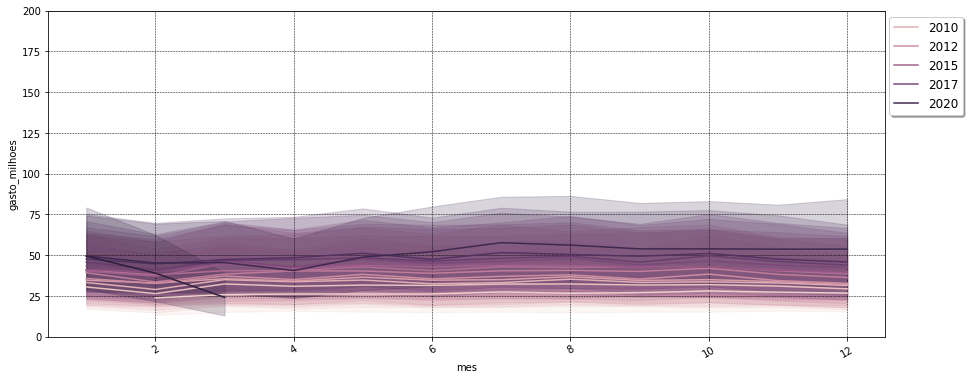

In [29]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=novo_mensal_aberto, x="mes", y="gasto_milhoes", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0,200)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.1, 1))
plt.show()

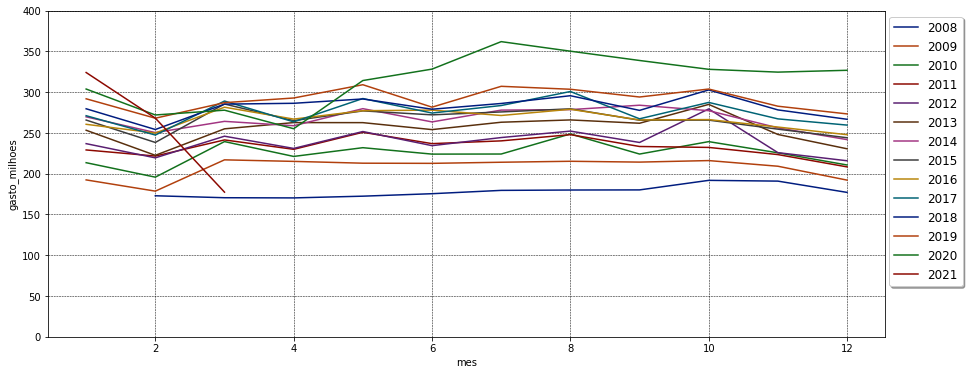

In [30]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=novo_mensal_aberto.query("uf == 'São Paulo'"), x="mes", y="gasto_milhoes", hue="ano", palette="dark")
# plt.xticks(rotation=30)
plt.ylim(0,400)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.1, 1))
plt.show()

Percebe-se que no mês de Fevereiro há uma queda nos gastos, por que será? Carnaval! Não. O mês de Fevereiro tem 28 dias!!!

Então é mais apropriado comparar o custo diário, e para isso temos que dividir o custo do mês pela quantidade de dias do mês!


In [31]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [32]:
novo_mensal_aberto['mes'].map(dias_por_mes)

0       28
1       31
2       30
3       31
4       30
        ..
4261    30
4262    31
4263    31
4264    28
4265    31
Name: mes, Length: 4266, dtype: int64

In [33]:
novo_mensal_aberto['gasto_diario'] = novo_mensal_aberto['gasto'] / novo_mensal_aberto['mes'].map(dias_por_mes)
novo_mensal_aberto['gasto_milhoes_diario'] = novo_mensal_aberto['gasto_milhoes'] / novo_mensal_aberto['mes'].map(dias_por_mes)
novo_mensal_aberto.head()

,dia_mes_ano,uf,gasto,gasto_milhoes,mes,ano,gasto_diario,gasto_milhoes_diario
0,2008-02-01,São Paulo,172961999.58,172.96,2,2008,6177214.27,6.18
1,2008-03-01,São Paulo,170556696.16,170.56,3,2008,5501828.91,5.50
2,2008-04-01,São Paulo,170338163.23,170.34,4,2008,5677938.77,5.68
3,2008-05-01,São Paulo,172462057.87,172.46,5,2008,5563292.19,5.56
4,2008-06-01,São Paulo,175492995.85,175.49,6,2008,5849766.53,5.85


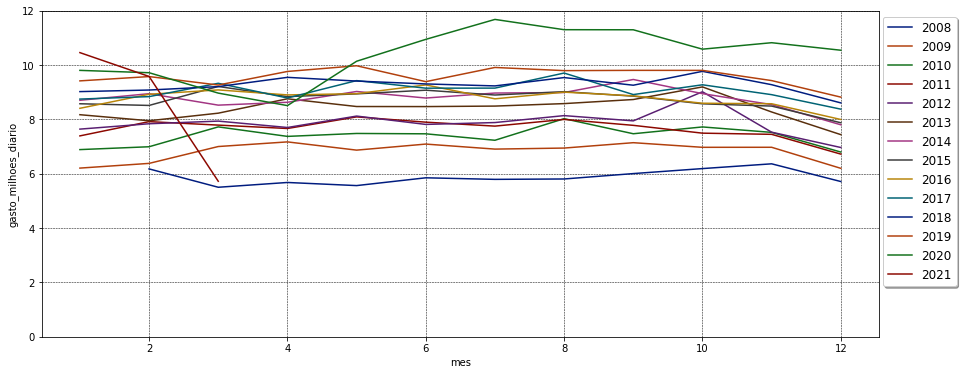

In [34]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=novo_mensal_aberto.query("uf == 'São Paulo'"), x="mes", y="gasto_milhoes_diario", hue="ano", palette="dark")
# plt.xticks(rotation=30)
plt.ylim(0,12)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.1, 1))
plt.show()

##**Desafios**

Desafio 01: Melhorar o gráfico ano a ano:

* Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.


#### **Desafio 01**

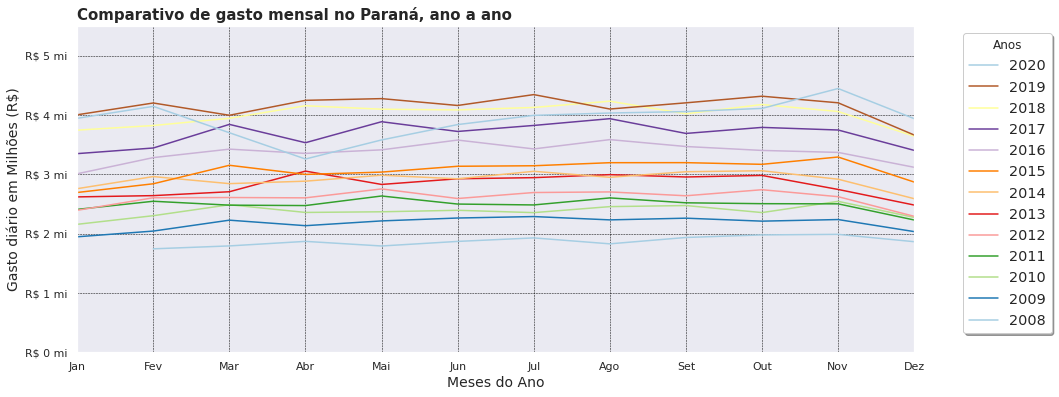

In [35]:
sns.set()
plt.figure(figsize=(15,6))
meses_ptbr = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

ax = sns.lineplot(data=novo_mensal_aberto.query("uf == 'Paraná' and ano < 2021"), 
                  x="mes",  y="gasto_milhoes_diario", 
                  hue="ano", palette=sns.color_palette("Paired", 13))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} mi'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

ax.set_title("Comparativo de gasto mensal no Paraná, ano a ano", fontsize=15, weight='black', loc='left')
ax.set_xlabel('Meses do Ano', fontsize=14)
ax.set_ylabel('Gasto diário em Milhões (R$)', fontsize=14)
ax.set_xticklabels(meses_ptbr)

plt.ylim(0,5.5)
plt.xlim(1,12)
plt.grid(color='black', linestyle='--', linewidth=0.5)
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),fontsize='large', frameon=True, facecolor='white', shadow=True, bbox_to_anchor=(1.05, 1), title='Anos')
plt.show()

#### **Desafio 02**

Apresentação do gráfico modo 1, utilizando o parâmetro **style** para apresentar uma linha em outro padrão para os estados.

Para não ficar uma linha pela "metade" vou remover o ano de 2021.

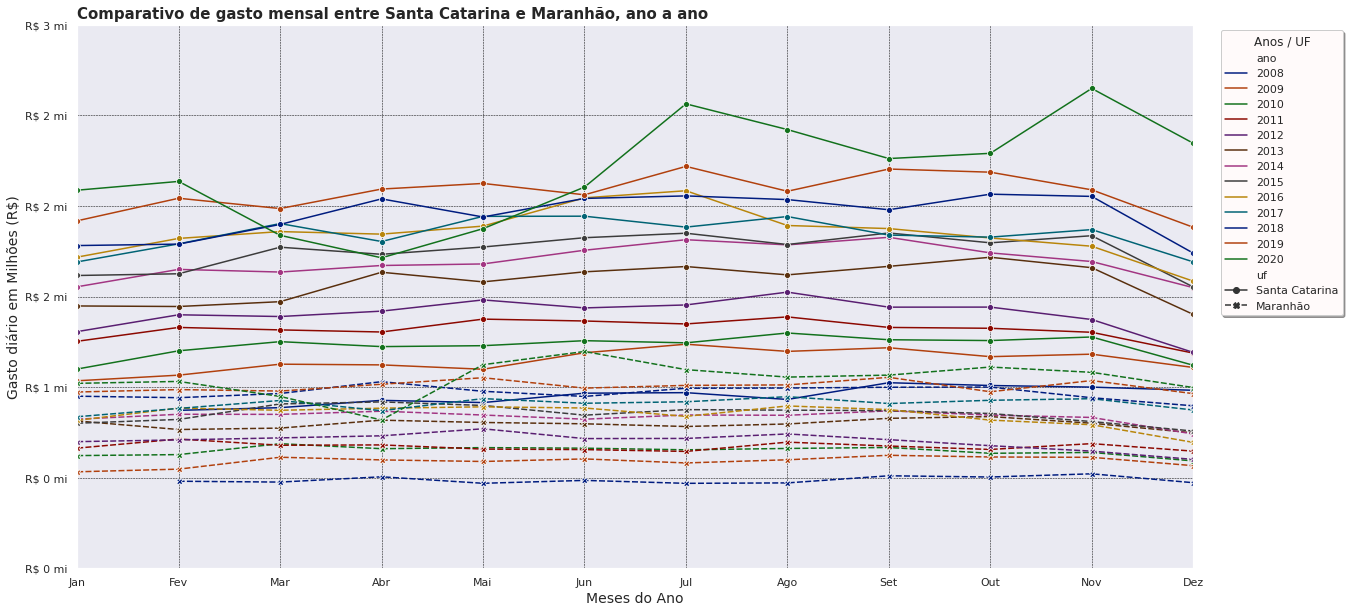

In [36]:
plt.figure(figsize=(20,10))
meses_ptbr = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
# não vamos utilizar os dados de 2021
ax = sns.lineplot(data=novo_mensal_aberto.query("uf in ('Santa Catarina', 'Maranhão') and ano < 2021"), 
                  x="mes",
                  y="gasto_milhoes_diario", 
                  hue="ano",
                  style="uf", markers=True, palette='dark' )
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} mi'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

ax.set_title("Comparativo de gasto mensal entre Santa Catarina e Maranhão, ano a ano", fontsize=15, weight='black', loc='left')
ax.set_xlabel('Meses do Ano', fontsize=14)
ax.set_ylabel('Gasto diário em Milhões (R$)', fontsize=14)
ax.set_xticklabels(meses_ptbr)

plt.ylim(0,3)
plt.xlim(1,12)
plt.grid(color='black', linestyle='--', linewidth=0.5)
ax.legend(facecolor='Snow', shadow=True, title='Anos / UF', bbox_to_anchor=(1.02, 1))
plt.show()

Apresentação do gráfico modo 2, apresentado os estados em gráficos separados.

Como é possível verificar no gráfico acima a linha do ano de 2020 está afetada pela pandemia de COVID-19, vamos remover o ano de 2020 no gráfico abaixo.

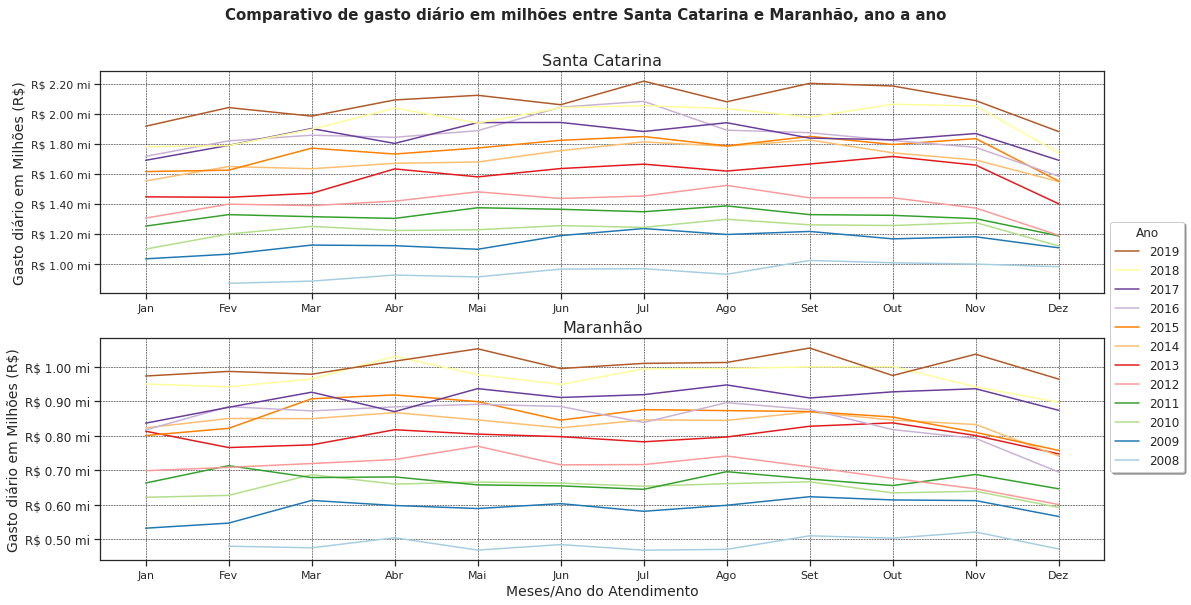

In [37]:
#Mudando o estilo de fundo
sns.set_style("ticks")
meses_ptbr = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

#Criando figura e eixos
fig, ax = plt.subplots(2, 1, figsize=(18,9)) 

# não vamos utilizar os dados de 2021
#Criando o gráfico
# Utilizando (for) from @leonardoBM 
uf_query = ['Santa Catarina', 'Maranhão']
for i in [0,1]:
  sns.lineplot(x='mes', y='gasto_milhoes_diario', hue='ano', data=novo_mensal_aberto.query(f"uf == '{uf_query[i]}' and ano < 2020"), 
              ax=ax[i],  palette=sns.color_palette("Paired", 12))
  ax[i].set_ylabel('Gasto diário em Milhões (R$)', fontsize=14)
  ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f} mi'))
  ax[i].set_xlabel('')
  ax[i].xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
  
  ax[i].set_title(uf_query[i], fontsize=16)
  ax[i].grid(color='black', linestyle='--', linewidth=0.5)
  ax[i].legend('', frameon=False)

ax[0].set_xticklabels(meses_ptbr)
ax[1].set_xticklabels(meses_ptbr)
ax[1].set_xlabel('Meses/Ano do Atendimento', fontsize=14)

# Titulo e Legendas
fig.suptitle("Comparativo de gasto diário em milhões entre Santa Catarina e Maranhão, ano a ano", fontsize=15, weight='black')
plt.yticks(fontsize=12)

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1, 1.55), fontsize=12, facecolor='White', shadow=True, title="Ano")


#Mostrando o gráfico
plt.show()

Foram utilizados os estados de Santa Catarina e Maranhão para análise.

**Santa Catarina**, Região Sul, Inverno com baixas temperaturas e população estimada em em 7,2 milhões de pessoas.

**Maranhão**, Região Nordeste, Verão com altas temperaturas e população estimada em em 7,1 milhões de pessoas.

* Não consegui chegar a uma conclusão se o inverno ou o verão estão afetando o gasto diário em Saúde nesses dois estados. Tem um pico em Julho de 2019 e 2016 em Santa Catarina, talvez o inverno tenha sido mais rigoroso. 

O que aprendemos nessa aula:

---

* Como fazer uma comparação ano a ano dos custos do SUS usando o DateTime;
* Como analisar e manipular os dados para criar análises mais avançadas.